<a href="https://colab.research.google.com/github/rc-j/Ml-pascal-assignments/blob/main/assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Q.1. Write a function to calculate the entropy of a given dataset.


In [ ]:
import numpy as np

def calculate_entropy(X, y):
    # Calculate the frequency of each class in the target variable
    class_counts = np.bincount(y)
    # Calculate the probabilities of each class
    probabilities = class_counts / len(y)
    # Calculate the entropy
    entropy = -np.sum([p * np.log2(p) for p in probabilities if p > 0])
    return entropy


# Example usage
X = np.array([[1, 2], [3, 4], [5, 6], [7, 8]])
y = np.array([0, 1, 0, 1])
print(calculate_entropy(X, y))

1.0


Q.2. Write a function to calculate the information gain of a given attribute in the dataset.

In [ ]:

import numpy as np

def calculate_entropy(y):
    # Calculate the frequency of each class in the target variable
    class_counts = np.bincount(y)
    # Calculate the probabilities of each class
    probabilities = class_counts / len(y)
    # Calculate the entropy
    entropy = -np.sum([p * np.log2(p) for p in probabilities if p > 0])
    return entropy

def calculate_information_gain(X, y, columns, attribute):
    # Find the index of the given attribute
    attr_index = columns.index(attribute)

    # Calculate the entropy of the entire dataset
    total_entropy = calculate_entropy(y)

    # Get the unique values of the attribute
    values, counts = np.unique(X[:, attr_index], return_counts=True)

    # Calculate the weighted entropy after the split
    weighted_entropy = 0
    for value, count in zip(values, counts):
        # Get the indices of samples where the attribute has the current value
        subset_indices = np.where(X[:, attr_index] == value)
        # Get the corresponding target values
        subset_y = y[subset_indices]
        # Calculate the entropy of the subset
        subset_entropy = calculate_entropy(subset_y)
        # Weight the subset entropy by the proportion of samples in the subset
        weighted_entropy += (count / len(y)) * subset_entropy

    # Calculate information gain
    information_gain = total_entropy - weighted_entropy
    return information_gain


# Example usage
X = np.array([[1, 2], [3, 4], [5, 6], [7, 8]])
y = np.array([0, 1, 0, 1])
columns = ['Feature1', 'Feature2']
attribute = 'Feature1'
gain = calculate_information_gain(X, y, columns, attribute)
print(gain)

1.0


Q.3. Write an ID3 algorithm to create a decision tree for given dataset.

In [ ]:
import numpy as np

def calculate_entropy(y):
    class_counts = np.bincount(y)
    probabilities = class_counts / len(y)
    entropy = -np.sum([p * np.log2(p) for p in probabilities if p > 0])
    return entropy

def calculate_information_gain(X, y, columns, attribute):
    attr_index = columns.index(attribute)
    total_entropy = calculate_entropy(y)
    values, counts = np.unique(X[:, attr_index], return_counts=True)
    weighted_entropy = 0
    for value, count in zip(values, counts):
        subset_indices = np.where(X[:, attr_index] == value)
        subset_y = y[subset_indices]
        subset_entropy = calculate_entropy(subset_y)
        weighted_entropy += (count / len(y)) * subset_entropy
    information_gain = total_entropy - weighted_entropy
    return information_gain

def id3(X, y, columns, depth=0):
    # If all target values are the same, return a leaf node with that value
    if len(np.unique(y)) == 1:
        return np.unique(y)[0]

    # If there are no more columns to split on, return the most common target value
    if len(columns) == 0:
        return np.bincount(y).argmax()

    # Find the attribute with the highest information gain
    gains = [calculate_information_gain(X, y, columns, col) for col in columns]
    best_attr_index = np.argmax(gains)
    best_attr = columns[best_attr_index]

    # Create the root node with the best attribute
    tree = {best_attr: {}}
    remaining_columns = columns[:best_attr_index] + columns[best_attr_index+1:]

    # Split the dataset based on the best attribute and recursively create branches
    attr_index = columns.index(best_attr)
    values = np.unique(X[:, attr_index])
    for value in values:
        subset_indices = np.where(X[:, attr_index] == value)
        subset_X = X[subset_indices]
        subset_y = y[subset_indices]
        subtree = id3(subset_X, subset_y, remaining_columns, depth + 1)
        tree[best_attr][value] = subtree

    return tree


# Example usage
X = np.array([[1, 2], [3, 4], [5, 6], [7, 8]])
y = np.array([0, 1, 0, 1])
columns = ['Feature1', 'Feature2']

# Build the decision tree
decision_tree = id3(X, y, columns)
print(decision_tree)

{'Feature1': {1: 0, 3: 1, 5: 0, 7: 1}}


In [1]:
!unzip /content/dataset.zip

Archive:  /content/dataset.zip
   creating: dataset/
   creating: dataset/nature/
  inflating: dataset/nature/1.png    
  inflating: dataset/nature/5.png    
  inflating: dataset/nature/4png.png  
  inflating: dataset/nature/2.png    
  inflating: dataset/nature/Screenshot_20240716_073900.png  
   creating: dataset/bike/
  inflating: dataset/bike/3.png      
  inflating: dataset/bike/4.png      
  inflating: dataset/bike/1.png      
  inflating: dataset/bike/5.png      
  inflating: dataset/bike/2.png      
   creating: dataset/guitar/
  inflating: dataset/guitar/3.png    
  inflating: dataset/guitar/4.png    
  inflating: dataset/guitar/1.png    
  inflating: dataset/guitar/5.png    
  inflating: dataset/guitar/2.png    
   creating: dataset/car/
  inflating: dataset/car/3.png       
  inflating: dataset/car/4.png       
  inflating: dataset/car/1.png       
  inflating: dataset/car/5.png       
  inflating: dataset/car/2.png       
   creating: dataset/dance/
  inflating: dataset/dan

Q.4. Create a dataset for object detection with 5 classes, each having 10 samples, organized into folders. Write a Python script using OpenCV to read images from a specified directory and use Matplotlib to display images from each class with the class name as the title.

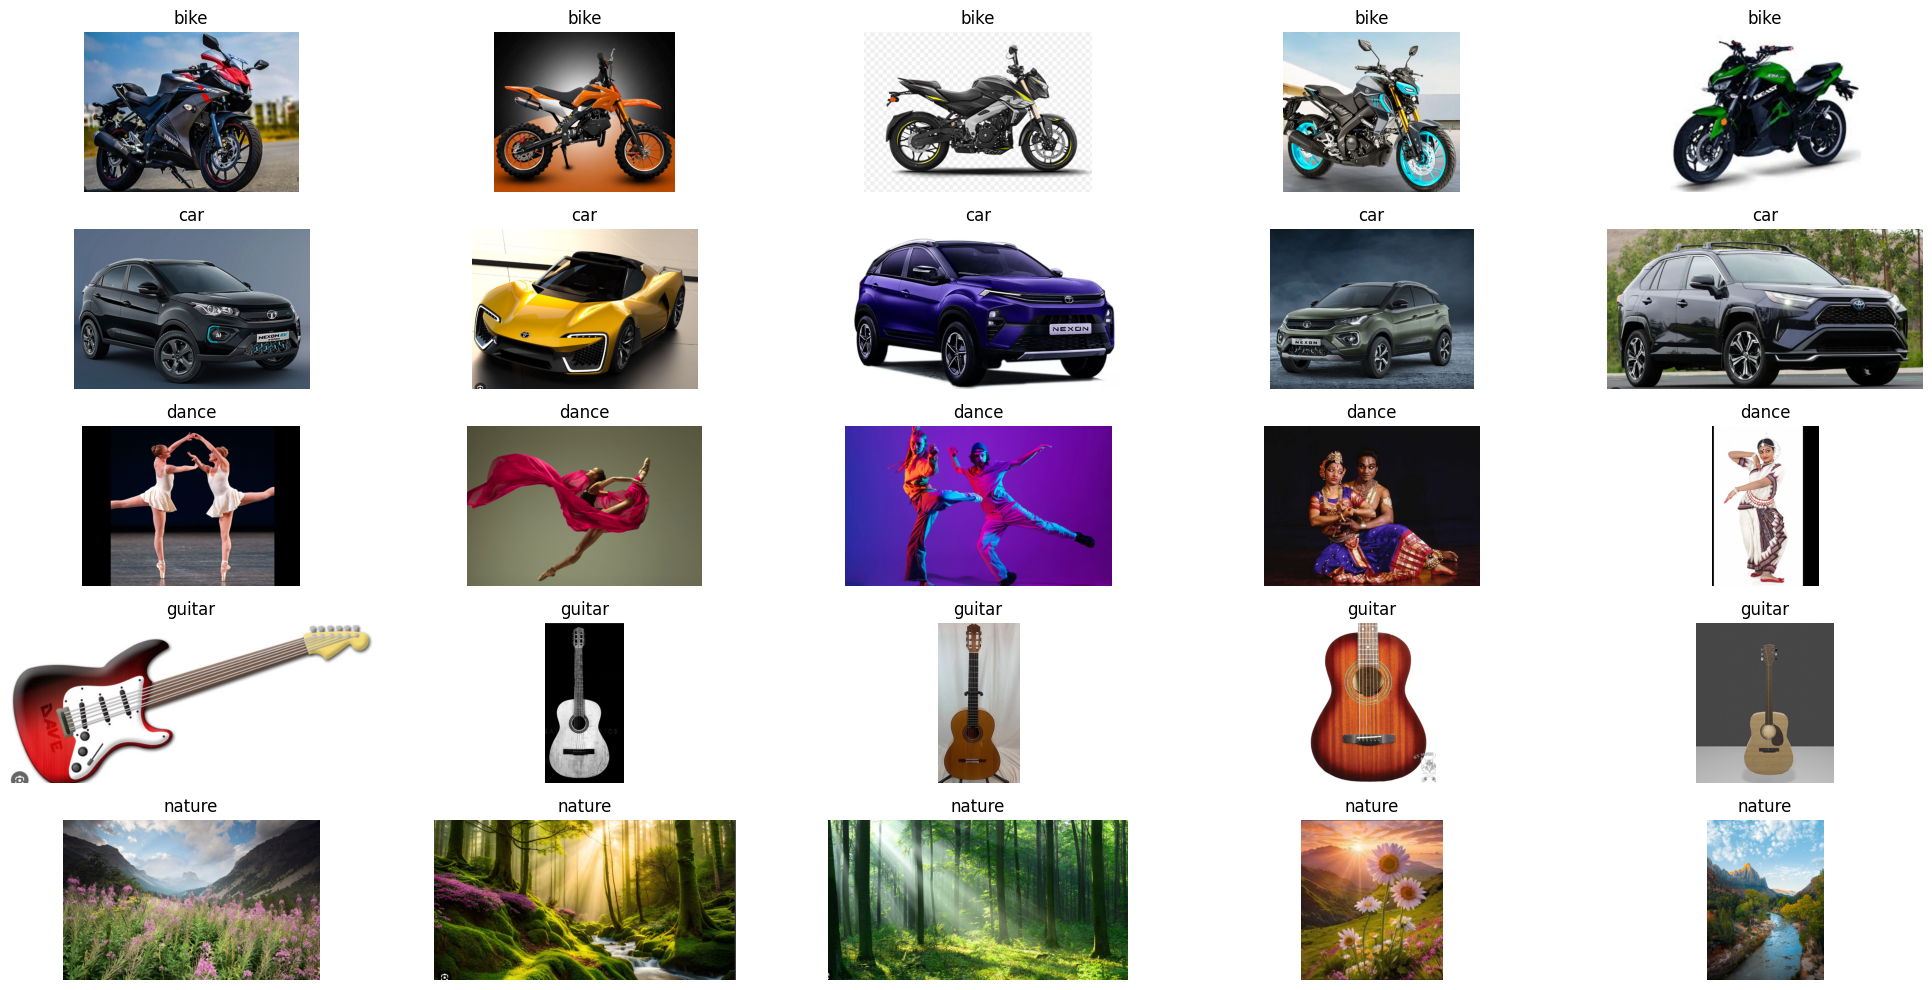

In [6]:
import os
import cv2
import matplotlib.pyplot as plt

# Define the dataset path
dataset_path = "/content/dataset"

# Function to read and display images
def display_images(dataset_path):
    # Get class names from subdirectories
    class_names = sorted(os.listdir(dataset_path))

    # Create a figure to display images
    fig, axs = plt.subplots(nrows=len(class_names), ncols=5, figsize=(20, 10))

    # Iterate through each class
    for i, class_name in enumerate(class_names):
        class_path = os.path.join(dataset_path, class_name)
        image_files = os.listdir(class_path)[:10]  # Select first 10 images

        # Iterate through each image in the class
        for j, image_file in enumerate(image_files):
            image_path = os.path.join(class_path, image_file)

            # Read the image using OpenCV
            image = cv2.imread(image_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB

            # Display the image
            axs[i, j].imshow(image)
            axs[i, j].set_title(class_name)
            axs[i, j].axis('off')

    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()

# Call the function to display images
display_images(dataset_path)

Q.5. Implement the linear regression algorithm from scratch and train it for the following snowfall data.

In [ ]:
import numpy as np

class LinearRegression:
    def __init__(self):
        self.coefficients = None  # To store the coefficients (theta)

    def fit(self, X, y):
        # Add a column of ones to X for the intercept term
        X = np.c_[np.ones(X.shape[0]), X]

        # Calculate coefficients using closed-form solution (normal equation)
        self.coefficients = np.linalg.inv(X.T @ X) @ X.T @ y

    def predict(self, X):
        # Add a column of ones to X for the intercept term
        X = np.c_[np.ones(X.shape[0]), X]

        # Predict y values
        y_pred = X @ self.coefficients
        return y_pred

# Given data
years = np.array([2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023])
snowfall = np.array([45.2, 42.5, 40.1, 38.6, 36.9, 35.2, 33.8, 32.5, 30.9, 29.6, 28.2, 26.8, 25.5, 24.3, 22.9])

# Reshape years to a column vector
years = years.reshape(-1, 1)

# Initialize and train the model
model = LinearRegression()
model.fit(years, snowfall)

# Predict for the year 2024
year_2024 = np.array([2024]).reshape(-1, 1)
snowfall_2024_pred = model.predict(year_2024)
print(f"Predicted snowfall for 2024 (from scratch): {snowfall_2024_pred[0]:.2f} inches")

Verifying using sklearn

In [ ]:

from sklearn.linear_model import LinearRegression as SklearnLinearRegression

# Initialize and train the scikit-learn LinearRegression model
sklearn_model = SklearnLinearRegression()
sklearn_model.fit(years, snowfall)

# Predict for the year 2024 using scikit-learn model
snowfall_2024_pred_sklearn = sklearn_model.predict([[2024]])
print(f"Predicted snowfall for 2024 (scikit-learn): {snowfall_2024_pred_sklearn[0]:.2f} inches")

Q.6. Implement the SVM classification algorithm from scratch.

In [ ]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

class SVM:
    def __init__(self, C=1.0, kernel='linear', degree=3, gamma='scale'):
        self.C = C
        self.kernel = kernel
        self.degree = degree
        self.gamma = gamma
        self.alpha = None
        self.b = 0
        self.X = None
        self.y = None

    def _kernel(self, x1, x2):
        if self.kernel == 'linear':
            return np.dot(x1, x2.T)
        elif self.kernel == 'poly':
            return (1 + np.dot(x1, x2.T))**self.degree
        elif self.kernel == 'rbf':
            if self.gamma == 'scale':
                gamma = 1 / (x1.shape[1] * np.var(self.X))
            else:
                gamma = self.gamma
            return np.exp(-gamma * np.sum((x1[:, None] - self.X) ** 2, axis=-1))

    def fit(self, X, y):
        self.X = X
        self.y = y
        n = X.shape[0]
        P = np.outer(y, y) * self._kernel(X, X)
        Q = np.eye(n) - P
        self.alpha = np.zeros(n)
        self.b = 0

        for _ in range(100):
            for i in range(n):
                g = np.sum(self.alpha * y * self._kernel(X, X[i])) + self.b
                if y[i] * g < 1:
                    self.alpha[i] = self.C
                else:
                    self.alpha[i] = 0

        self.b = np.mean([y_i - np.sum(self.alpha * y * self._kernel(X, X[i])) for i, y_i in enumerate(y)])

    def predict(self, X):
        return np.sign(np.sum(self.alpha * self.y * self._kernel(self.X, X.T), axis=0) + self.b)


# Generate synthetic data
X, y = make_blobs(n_samples=100, centers=2, n_features=2, random_state=42)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize SVM model
svm = SVM(C=1.0, kernel='rbf')
svm.fit(X_train, y_train)

# Predict on test set
predictions = svm.predict(X_test)